In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet(f'cleaned_data.parquet')
print(f"dataset rows: {len(df)}")


dataset rows: 2960345


<AxesSubplot:title={'center':'Marathon Races'}, xlabel='Marathon', ylabel='Count of Runners (In 1000s)'>

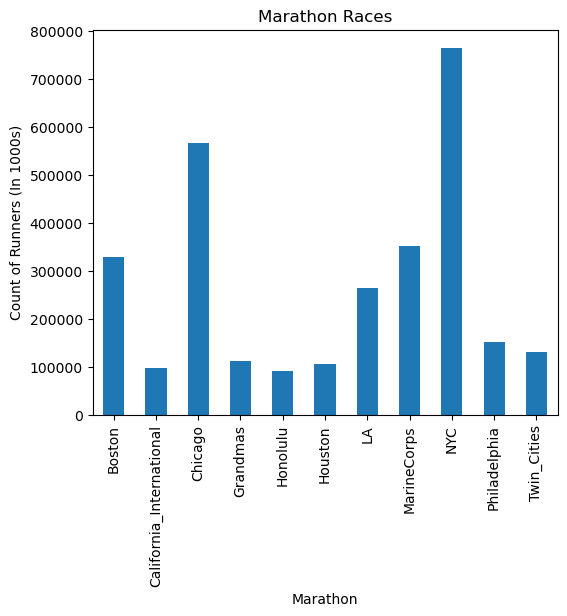

In [41]:
df['age_group'] = pd.cut(df['age'], bins=[18,30, 40, 50, 60, 70, 80, 90])
drg = df.groupby(['marathon'])["name"].count()/1000
drg.plot(kind='bar', title='Marathon Races', ylabel='Count of Runners (In 1000s)',
         xlabel='Marathon', figsize=(6, 5))

<AxesSubplot:title={'center':'Marathon Times by Age'}, xlabel='Boston Marathon Defined Age Groups', ylabel='Marathon Finish Time (in minutes)'>

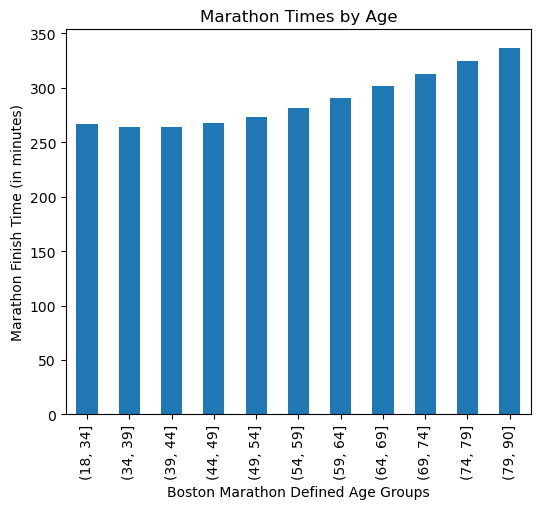

In [22]:
df['age_group'] = pd.cut(df['age'], bins=[18,34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 90])
drg = df.groupby(['age_group'])["time"].mean()
drg.plot(kind='bar', title='Marathon Times by Age', ylabel='Marathon Finish Time (in minutes)',
         xlabel='Boston Marathon Defined Age Groups', figsize=(6, 5))
        

Text(0.5, 1.0, 'Marathon Runner Density by Age')

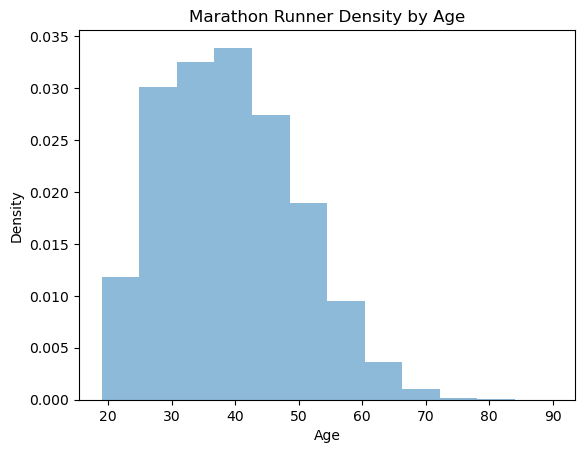

In [48]:
ax = ((df.age)).plot.hist(bins=12, alpha=0.5, xlabel='Age', density=True)
ax.set_xlabel("Age")
ax.set_ylabel("Density")
ax.set_title("Marathon Runner Density by Age")

<AxesSubplot:title={'center':'Marathon Races'}, xlabel='Year', ylabel='Count of Runners'>

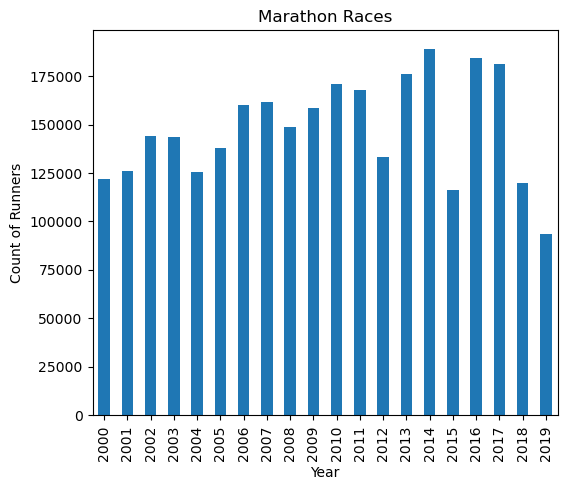

In [28]:
df['year'] = df['year'].astype(int)
drg = df.groupby(['year'])["name"].count()
drg.plot(kind='bar', title='Marathon Races', ylabel='Count of Runners',
         xlabel='Year', figsize=(6, 5))

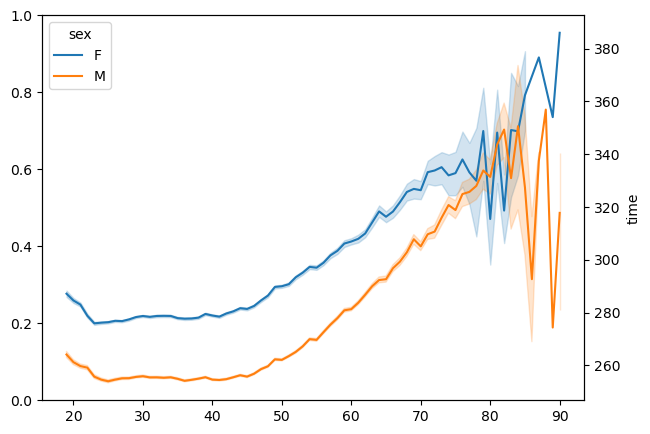

In [7]:
import seaborn as sns
grouped = df.groupby(['age', 'sex'])['time'].mean()

fig, ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
sns.lineplot(x='age',y='time', data=df, hue='sex', ax=ax2)
plt.show()

<AxesSubplot:title={'center':'Marathon Races'}, xlabel='Marathon', ylabel='Count of Runners'>

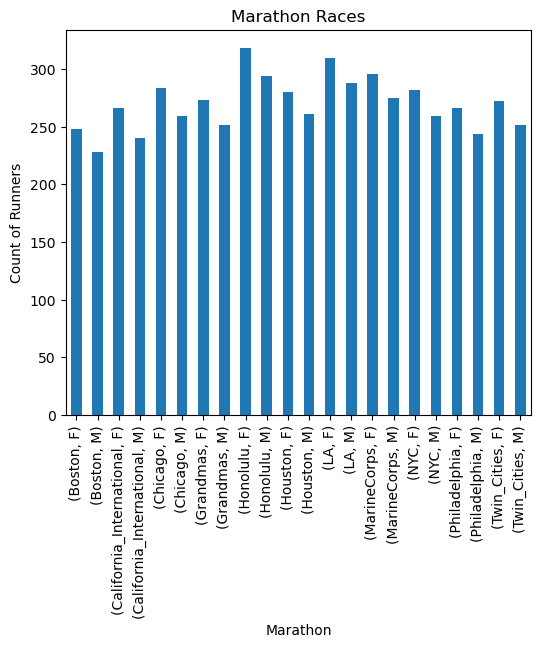

In [12]:
drg = df.groupby(['marathon', 'sex'])["time"].mean()
drg.plot(kind='bar', title='Marathon Races', ylabel='Count of Runners',
         xlabel='Marathon', figsize=(6, 5))

Note the small sample and survivor bias that occurs around 75+

<AxesSubplot:ylabel='Frequency'>

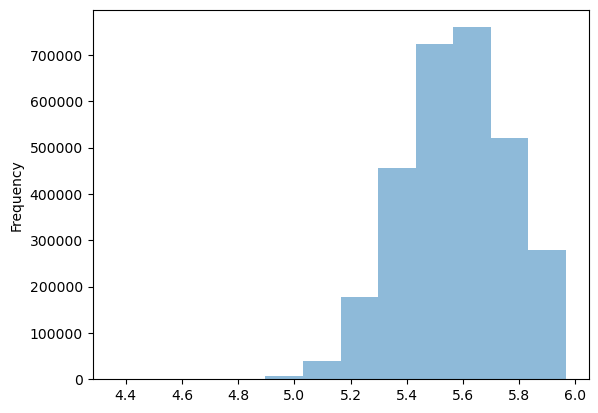

In [8]:
import numpy as np
df['log_time'] = np.log(df.time)
df.log_time.plot.hist(bins=12, alpha=0.5)

In [19]:
import scipy.stats as stats
print("Time normal test results: ")
print(stats.normaltest(df.time))
print("Log(Time) normal test results: ")
print(stats.normaltest(np.log(df.time)))

Time normal test results: 
NormaltestResult(statistic=88738.06016308484, pvalue=0.0)
Log(Time) normal test results: 
NormaltestResult(statistic=65122.891174744014, pvalue=0.0)
